# Linear regresision using matrix multiplication
https://gist.github.com/marcelcaraciolo/1321569

In [36]:
from numpy import loadtxt, zeros, ones, array, linspace, logspace
from pylab import scatter, show, title, xlabel, ylabel, plot, contour
import matplotlib.pyplot as plt
import pandas as pd


#Evaluate the linear regression
def compute_cost(X, y, theta):
    '''
    Comput cost for linear regression
    '''
    #Number of training samples
    m = y.size

    predictions = X.dot(theta).flatten()

    sqErrors = (predictions - y) ** 2

    J = (1.0 / (2 * m)) * sqErrors.sum()

    return J


def gradient_descent(X, y, theta, alpha, num_iters):
    '''
    Performs gradient descent to learn theta
    by taking num_items gradient steps with learning
    rate alpha
    '''
    m = y.size
    J_history = zeros(shape=(num_iters, 1))

    for i in range(num_iters):

        predictions = X.dot(theta).flatten()
        errors_x1 = (predictions - y) * X[:, 0]
        errors_x2 = (predictions - y) * X[:, 1]
        theta[0][0] = theta[0][0] - alpha * (1.0 / m) * errors_x1.sum()
        theta[1][0] = theta[1][0] - alpha * (1.0 / m) * errors_x2.sum()
        J_history[i, 0] = compute_cost(X, y, theta)

    return theta, J_history




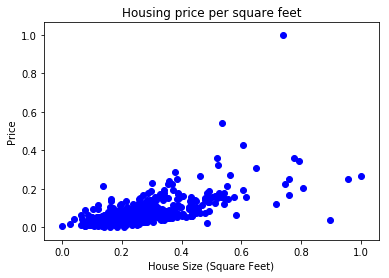

In [17]:
#Load the dataset
data=pd.read_csv("C:\One drive sync\OneDrive - Micron Technology, Inc\Trainings\Python\DataScience\RealEstate.csv")

x=(data['Size']-data['Size'].min())/(data['Size'].max()-data['Size'].min())
y=(data['Price']-data['Price'].min())/(data['Price'].max()-data['Price'].min())
#Plot the data
scatter(x, y, marker='o', c='b')
title('Housing price per square feet')
xlabel('House Size (Square Feet)')
ylabel('Price')
show()



In [18]:
#number of training samples
m = y.size

#Add a column of ones to X (interception data)
it = ones(shape=(m, 2))
it[:, 1] = x

#Initialize theta parameters
theta = zeros(shape=(2, 1))

#Some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradient_descent(it, y, theta, alpha, iterations)

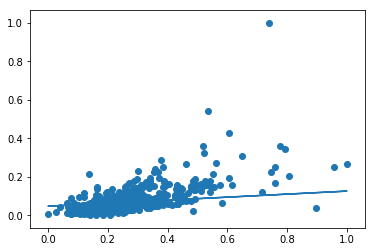

In [53]:
for i in range(x.shape[0]):
        y_predict = theta[0][0]+ theta[1][0]*x

plt.scatter(x, y)
plt.plot(x,y_predict) 

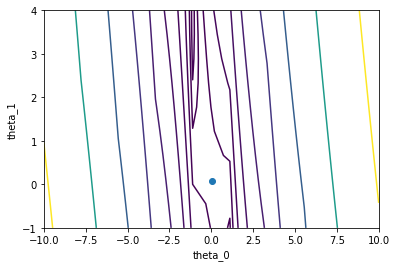

In [27]:
#Grid over which we will calculate J
theta0_vals = linspace(-10, 10, 10)
theta1_vals = linspace(-1, 4, 10)


#initialize J_vals to a matrix of 0's
J_vals = zeros(shape=(theta0_vals.size, theta1_vals.size))

#Fill out J_vals
for t1, element in enumerate(theta0_vals):
    for t2, element2 in enumerate(theta1_vals):
        thetaT = zeros(shape=(2, 1))
        thetaT[0][0] = element
        thetaT[1][0] = element2
        J_vals[t1, t2] = compute_cost(it, y, thetaT)

#Contour plot
J_vals = J_vals.T
#Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
xlabel('theta_0')
ylabel('theta_1')
scatter(theta[0][0], theta[1][0])
show()

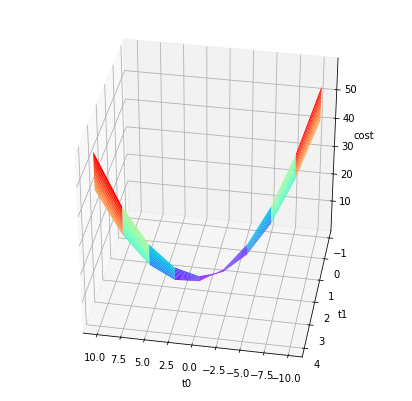

In [49]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection="3d")
ax.set_xlabel(r't0')
ax.set_ylabel(r't1')
ax.set_zlabel(r'cost')
ax.view_init(elev=35, azim=100)
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap=cm.rainbow)